In [17]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt 

In [18]:
df=pd.read_csv("standardscaler_.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience_Years  500 non-null    float64
 1   Age               500 non-null    float64
 2   Education_Level   500 non-null    int64  
 3   Hours_Per_Week    500 non-null    float64
 4   Salary            500 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


In [20]:
x=df.drop(['Salary'],axis=1)
y=df['Salary']

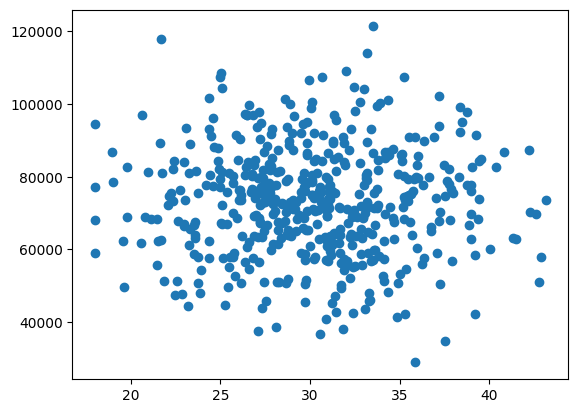

In [21]:
plt.scatter(df['Age'],y)

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(xtrain)
model = LinearRegression()
model.fit(x_poly,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
x_poly

array([[1.0000000e+00, 5.8100000e+00, 2.2970000e+01, ..., 1.0000000e+00,
        4.2930000e+01, 1.8429849e+03],
       [1.0000000e+00, 6.4400000e+00, 1.9010000e+01, ..., 9.0000000e+00,
        1.0731000e+02, 1.2794929e+03],
       [1.0000000e+00, 2.1800000e+00, 3.3760000e+01, ..., 1.6000000e+01,
        1.6556000e+02, 1.7131321e+03],
       ...,
       [1.0000000e+00, 3.5600000e+00, 2.6810000e+01, ..., 1.0000000e+00,
        3.5010000e+01, 1.2257001e+03],
       [1.0000000e+00, 5.1500000e+00, 2.7490000e+01, ..., 1.0000000e+00,
        4.5150000e+01, 2.0385225e+03],
       [1.0000000e+00, 4.3100000e+00, 3.4350000e+01, ..., 1.6000000e+01,
        1.4664000e+02, 1.3439556e+03]], shape=(400, 15))

In [25]:
xtpoly = poly.transform(xtest)


In [26]:
y_pred = model.predict(xtpoly)

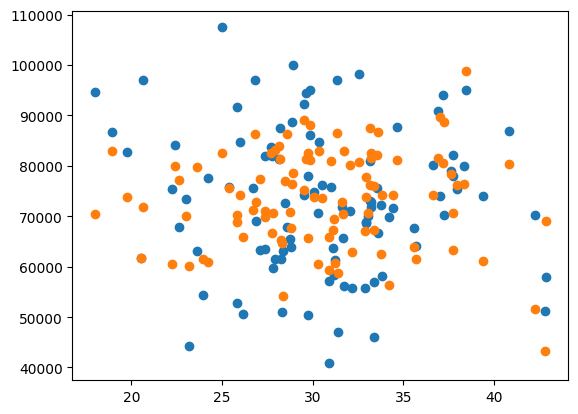

In [27]:
plt.scatter(xtest['Age'],ytest)
plt.scatter(xtest['Age'],y_pred)


In [28]:
r2_score(ytest,y_pred)

0.28606945938266415

In [29]:
model.score(xtpoly,ytest)

0.28606945938266415